# SIR Pandemic Modeling

March 26, 2020
by Will Slaton

*Note: I'm a physicist not a mathematical epidemiologist! Take the following with a grain of salt and use commonsense when interperting results.*

Given the COVID-19 pandemic I wanted to better understand simple mathematical models for disease spread. This wikipedia [article](https://en.wikipedia.org/wiki/Mathematical_modelling_of_infectious_disease "Mathematical_modelling_of_infectious_disease") is good for the basics and background as well as this [chapter](https://link.springer.com/content/pdf/10.1007%2F978-1-4614-1686-9_9.pdf) from a book. Also, I'll be following these [lecture notes](https://jmahaffy.sdsu.edu/courses/f17/math636/beamer/sir.pdf "Discrete SIR Models") for comparison to the output from the code that follows when fitting CDC data to the SIR model to determine unknown parameters. I am sure there are better resoures out there but this is where I started.

### Continuous Model

The basic model being considered is called SIR for (S)usceptible, (I)nfected, and (R)ecovered. There are many variants on the SIR model that can be explored but what follows is the simplist. We assume that the total population is constant so that $N = S(t) + I(t) + R(t)$ and that the recovered population cannot be reinfected. 

The rate of change in the number of susceptible members of the population should depend on how many average potentially infectious interactions per unit time the susceptible population ($\beta S$) has times the percentage of infected people in the population ($I/N$), hence,

$$\frac{dS(t)}{dt} = -\frac{\beta S I}{N}.$$

The rate of change in the number of recovered members of the population should depend on the number per unit time of the infected members of the population who recover from the illness, $(\gamma I)$, hence,
$$\frac{dR(t)}{dt} = \gamma I.$$ 

It is often noted that $1/\gamma$ can also be thought of as the average length of the infectious period. Lastly, since the total number $N$ of the population is constant then,

$$\frac{dN}{dt} = \frac{dS}{dt} + \frac{dI}{dt} + \frac{dR}{dt} = 0,$$

or,

$$\frac{dI}{dt} = -\frac{dS}{dt} - \frac{dR}{dt} = \frac{\beta S I}{N} - \gamma I.$$

So, I think I(t) is the tested infected since we have that data. 3rd equation says that the integral of $\gamma I(t)$ is the total recovered - and total recovered (or removed) is the real number who were sick. $\gamma$ is the rate for the infected to become recovered, $1/\gamma$ is often called "the infectious period". Note that "recovered" doesn't mean well you just aren't infectious as far as the model is concerned. New people are infected at a rate of $\beta / N$. The larger $\beta$ the more infectious the disease, the smaller $\gamma$ (or the larger $1/\gamma$) the longer people are infectious, and hence, can infect more susceptible people. 

The discrete phenomena of infected people can be adaquetly modeled by a continous system of eqations as long as the numbers are large. However, we don't know empirical values for $\beta$ or $\gamma$ but there is a way to determine them from a discrete version of the above equations applied to historic [Centers for Disease Control](https://www.cdc.gov/flu/weekly/pastreports.htm) data. 

### Discrete Model
Since the CDC data is reported in integral numbers of infections per unity time we need discrete versions of our equations to fit the data to determine the coefficients $\beta$ and $\gamma$. Hence, 

$$\frac{dS}{dt} \rightarrow \frac{S_{n} - S_{n-1}}{\Delta t},$$
or
$$S_{n} = S_{n-1} -\frac{\beta S_{n-1} I_{n-1}}{N}\Delta t.$$
Similarly for the other equations,
$$I_{n} = I_{n-1} + \frac{\beta S_{n-1} I_{n-1}}{N}\Delta t - \gamma I_{n-1} \Delta t,$$
and,
$$R_{n} = R_{n-1} + \gamma I_{n-1} \Delta t.$$

The time interval for the data, $\Delta t$, is reported by the CDC once a week so $\Delta t = 1$. Our discrete equations are then:
$$S_{n} = S_{n-1} -\frac{\beta S_{n-1} I_{n-1}}{N},$$
$$I_{n} = I_{n-1} + \frac{\beta S_{n-1} I_{n-1}}{N} - \gamma I_{n-1},$$
and,
$$R_{n} = R_{n-1} + \gamma I_{n-1}.$$
We'll return to the discrete model in a bit.

### Basic Reproduction Ratio
The basic reproduction ratio is given by,
$$R_0 = \frac{\beta}{\gamma} = \beta \times \frac{1}{\gamma},$$
and gives a measure of the severity of the outbreak. A large $R_0$ means a severe outbreak which can be caused by a large $\beta$ (very infectious disease that infects many people during a given time period) and/or a large $1/\gamma$ which means the infected person is infected for a long period of time which means they can infect even more people.

### Mathematical Modeling
Lets first get a feel for how our continuous equations look when solved computationally with made up numbers for $\beta$ and $\gamma$. If we pick $\gamma = 1$ then a low, medium and high value for $\beta$ we can model the effect for low, medium, and high values of $R_0$ since $R_0 = \beta/\gamma$. Lets choose the following values for $\beta$: 0.667, 1.0, 1.5; which result in $R_0$ values of: 0.667, 1.0, and 1.5. We'll assume that 0.01% of the population is intitially infected and let the model run for 25 weeks using a 4th-order Runge-Kutta algorithm to solve the coupled equations.

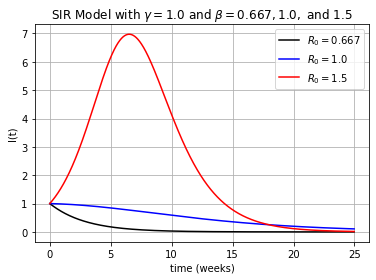

In [46]:
# import relevant libaries
import numpy as np
from pylab import *
%matplotlib inline

#####################################################
# Plot S(t), I(t), and R(t) for no intervention
#####################################################

def f(beta,gamma,z,t):
    S=z[0]
    I=z[1]
    R=z[2]
    fx = - beta*S*I/Npop                    # fx = dS/dt
    fy = beta*S*I/Npop - gamma*I            # fy = dI/dt
    fz = gamma*I                            # fz = dR/dt
    return array([fx,fy,fz],float)

a = 0.0 # start of interval
b = 25.0 # end of interval (weeks)
N = 1000 # number of steps
h = (b-a)/N # size of a single step

tpoints = np.arange(a,b,h)
Spoints_1=[]
Ipoints_1=[]
Rpoints_1=[]

Spoints_2=[]
Ipoints_2=[]
Rpoints_2=[]

Spoints_3=[]
Ipoints_3=[]
Rpoints_3=[]

##############
# scale solution to get percentages of population
##############
Npop = 100
percent_infected = 0.01 # fraction of initial infection

Si = Npop - percent_infected*Npop # initial number of suspectible
Ii = percent_infected*Npop # initial number of infected
Ri = 0 # initial number of recovered

z_1 = array([Si,Ii,Ri],float)
z_2 = array([Si,Ii,Ri],float)
z_3 = array([Si,Ii,Ri],float)

for t in tpoints:
    gamma = 1
    # test 1
    beta = 0.6667
    Spoints_1.append(z_1[0])
    Ipoints_1.append(z_1[1])
    Rpoints_1.append(z_1[2])
    k1 = h*f(beta,gamma,z_1,t)
    k2 = h*f(beta,gamma,z_1+0.5*k1,t+0.5*h)
    k3 = h*f(beta,gamma,z_1+0.5*k2,t+0.5*h)
    k4 = h*f(beta,gamma,z_1+k3,t+h)
    z_1 = z_1 + (k1+2*k2+2*k3+k4)/6
    # test 2
    beta = 1.0
    Spoints_2.append(z_2[0])
    Ipoints_2.append(z_2[1])
    Rpoints_2.append(z_2[2])
    k1 = h*f(beta,gamma,z_2,t)
    k2 = h*f(beta,gamma,z_2+0.5*k1,t+0.5*h)
    k3 = h*f(beta,gamma,z_2+0.5*k2,t+0.5*h)
    k4 = h*f(beta,gamma,z_2+k3,t+h)
    z_2 = z_2 + (k1+2*k2+2*k3+k4)/6
    # test 3
    beta = 1.5
    Spoints_3.append(z_3[0])
    Ipoints_3.append(z_3[1])
    Rpoints_3.append(z_3[2])
    k1 = h*f(beta,gamma,z_3,t)
    k2 = h*f(beta,gamma,z_3+0.5*k1,t+0.5*h)
    k3 = h*f(beta,gamma,z_3+0.5*k2,t+0.5*h)
    k4 = h*f(beta,gamma,z_3+k3,t+h)
    z_3 = z_3 + (k1+2*k2+2*k3+k4)/6

# create the plot
plot(tpoints,Ipoints_1, linestyle='solid', color='black', label='$R_0 = 0.667$')
plot(tpoints,Ipoints_2, linestyle='solid', color='blue', label='$R_0 = 1.0$')
plot(tpoints,Ipoints_3, linestyle='solid', color='red', label='$R_0 = 1.5$')

#legend(loc='center left')
legend(loc='upper right')
title("SIR Model with $\\gamma = 1.0$ and $\\beta =0.667, 1.0,$ and $1.5$")
xlabel("time (weeks)")
ylabel("I(t)")
grid()
show()

Our model is plotting $I(t)$ as a percentace of the population vs time. So, an intitial 1% infected population increases to 7% before decreasing back to zero. What is interesting here is that for values of $R_0\leq 1$ the number of infected people does not increase meaning that the infection dies out. The smaller $R_0$ the faster the infection dies out (black curve). For values of $R_0 > 1$ the number of infected people increases in the population to a maximum before dying out due to immunity of enough people (red curve). The math lecture notes mentioned in the introduction contain a nice equilibrium analysis for the simple SIR model. Play with the model by changing the initial infection percentage as well as the values for $\beta$ to see what happens. You can also plot $S(t)$ and $R(t)$ by modifying the code.

### 2004-2005 CDC Flu Data
To attempt to follow the example in the math lectute notes we'll examine the 2004-2005 flu data from the [Centers for Disease Control](https://www.cdc.gov/flu/weekly/pastreports.htm) data. Actually, we won't because I can't fnd where the author of those lecture notes got his data. The 2004-2005 CDC data is similar to his data, so we'll use his data to compare the output of our models and gain confidence. We'll return to the CDC data later in the notebook.

Optimization terminated successfully.
         Current function value: 155082.983588
         Iterations: 87
         Function evaluations: 162
Fits to the 2004-2005 flu season data:
beta = 3.9927573979399074
gamma =  3.517003507194411
R0 =  1.1352725096157257
The average amount of time (days) a person is infectious =  1.9903306851075762


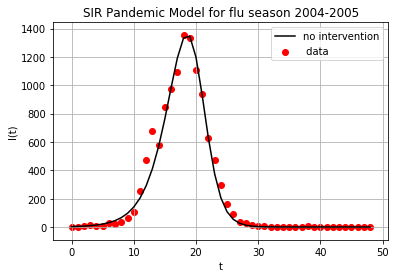

In [47]:
# import relevant libaries
from scipy import optimize
import numpy as np
from pylab import *
%matplotlib inline

# data from that Math lecture notes pdf
# I cant find agreement between his data and the CDC data for 2004-2005 so run with his data
# data contains the number of positive H3N1 flu tests each week.
data = [3,2,7,12,9,10,27,21,36,63,108,255,472,675,580,844,974,1096,1354,1335,1109,936,627,476,295,164,94,37,26,15,8,5,3,1,2,0,2,1,6,0,0,1,0,0,0,1,0,3,0]

Ntot = 157759 # this is the total number of tests performed during the 2004-2005 flu season

def func(x): # x[0] = beta, x[1] = gamma
    global In
    Sn = [Ntot - data[0]] # initial number susecptible are Ntot - the first number of infected people, data[0]
    In = [data[0]]        # initial number of infected are data[0]
    for i in range(1,len(data)):
        Sn.append(Sn[i-1] - x[0]*Sn[i-1]*In[i-1]/Ntot)
        In.append(In[i-1] + x[0]*Sn[i-1]*In[i-1]/Ntot - x[1]*In[i-1])  
    
    # compute the least-squares error
    error = 0
    for j in range(len(data)):
        error = error + (data[j] - In[j])**2
    return error

initial_guesses = [1,1] # [beta,gamma]
# the following routine calls the funtion func with initial guesses for unknowns and iterates until ???
minimum = optimize.fmin(func, initial_guesses) 
In_no_intervention = In
beta = minimum[0] # infection rate
gamma = minimum[1] # recovery rate

print("Fits to the 2004-2005 flu season data:")
print('beta =', beta)
print('gamma = ', gamma)
print("R0 = ", beta/gamma)
print("The average amount of time (days) a person is infectious = ", (1/gamma)*7)

# create the plot
tpoints = np.array(range(0,len(data)))
plot(tpoints,In_no_intervention, color='black', label='no intervention')
scatter(tpoints,data, color='red', label=' data')
legend(loc='upper right')
title("SIR Pandemic Model for flu season 2004-2005")
xlabel("t")
ylabel("I(t)")
grid()
show()

scipy's optimizer has found that $\beta \sim 4$ potentially infectious interactions per week and $1/\gamma \sim 2$ days for the infectious period. These seem like reasonable values. Additionally, $R_0 = 1.13$ which is greater than 1 so the infection spreads in the population. These values are specific to the particular strand of flu each season as well as on the number of people getting tested.

We can model the effect of three mitigation scenarios: (1) vaccinate the population, (2) quarantine the population, or (3) tamiflu treatment.

#### Vaccination
Assume that 5% of the succeptible population is vaccinated. This means that our starting value of susceptible people is now $0.95 N_{tot} - I(0)$ where $I(0)$ is the initial number of infected people from the CDC data. The vaccinated people are immediately in the recovered group.

#### Quarantine / Isolation
A qurantine means that the sick people are kept in their homes while isolation means that non-sick people avoid interaction. As far as the model is concerned this means that $\beta$ is a smaller value meaning that there are fewer potentially infectious interactions during each week. Lets assume that $\beta$ decreases by 5% on average due to some of the infectious people being in quarantine while everything else is the same as before.

#### Tamiflu
From a microbiologist friend: "[Tamiflu] takes about 3 days to build up in a [infected] person's system. By that time, they're usually already on their way to recovery....or dead. Tamiflu is best used to prevent spread of flu to close contacts of an infected individual, not to treat the individual themselves." In the mathematics lecture notes we are following the Tamiflu treatment is considered as a modification to the value of $\gamma$; however, with the input from my microbiologist friend I think Tamiflu is really modifying $\beta$ which doesn't add to our discussion here.

Running the code block below results in plots for the two main possibilities being added to the model fit and CDC data.

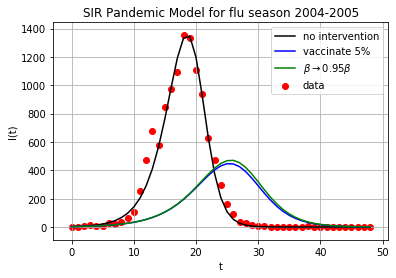

In [48]:
#############################################################
# Vaccinate (5% of suseptible population move to recovered)
#############################################################
def func_vac(x): # x[0] = beta, x[1] = gamma
    Sn = [0.95*Ntot - data[0]]
    In = [data[0]]
    for i in range(1,len(data)):
        Sn.append(Sn[i-1] - x[0]*Sn[i-1]*In[i-1]/Ntot)
        In.append(In[i-1] + x[0]*Sn[i-1]*In[i-1]/Ntot - x[1]*In[i-1])  
    return In

In_vaccinate = func_vac(minimum)

#############################################################
# Quarantine  (contact rate (beta) decreases by 5%)
#############################################################
def func_quarantine(x): # x[0] = beta, x[1] = gamma
    Sn = [Ntot - data[0]]
    In = [data[0]]
    for i in range(1,len(data)):
        Sn.append(Sn[i-1] - x[0]*Sn[i-1]*In[i-1]/Ntot)
        In.append(In[i-1] + x[0]*Sn[i-1]*In[i-1]/Ntot - x[1]*In[i-1])  
    return In

In_quarantine = func_quarantine([0.95*minimum[0],minimum[1]])

# create the plot
tpoints = np.array(range(0,len(data)))
plot(tpoints,In_no_intervention, color='black', label='no intervention')
plot(tpoints,In_vaccinate, color='blue', label='vaccinate 5%')
plot(tpoints,In_quarantine, color='green', label=r'$\beta \rightarrow 0.95 \beta$')
scatter(tpoints,data, color='red', label='data')
legend(loc='upper right')
title("SIR Pandemic Model for flu season 2004-2005")
xlabel("t")
ylabel("I(t)")
grid()
show()

What is nice to see is that an additional modest vaccination rate or self-isolation can do a remarkable job of lowering the peak number of infections. This is literally "flattening the curve!" Note: the CDC data already includes whatever percent of the population that is vaccinated. We are probing what effect an additional 5% getting vaccinated would cause.

#### Modeling S(t), I(t), R(t)
Our continuous equations (with $\beta$ and $\gamma$ now identified) can be used to model the flu's spread as a function of time. We'll solve this with a 4th-order Runge-Kutta with 1000 steps for the 49-week period. Lets also plot the solution for $S(t)$, $I(t)$, and $R(t)$ for both the original case and assuming that an additional 5% of the population had gotten their flu shot.

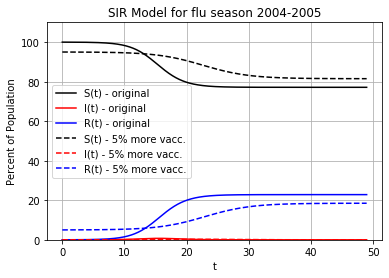

In [49]:
#####################################################
# Plot S(t), I(t), and R(t) for no intervention
#####################################################
def f(z,t):
    S=z[0]
    I=z[1]
    R=z[2]
    fx = - beta*S*I/Npop                    # fx = dS/dt
    fy = beta*S*I/Npop - gamma*I            # fy = dI/dt
    fz = gamma*I                            # fz = dR/dt
    return array([fx,fy,fz],float)

a = 0.0 # start of interval
b = 49.0 # end of interval (weeks)
N = 1000 # number of steps
h = (b-a)/N # size of a single step

tpoints = np.arange(a,b,h)
Spoints_no_intervention=[]
Ipoints_no_intervention=[]
Rpoints_no_intervention=[]

Spoints_intervention=[]
Ipoints_intervention=[]
Rpoints_intervention=[]

##############
# scale solution to get percentages of population
##############
Npop = 100
percent_infected = data[0]/Ntot

Si_no_intervention = Npop - percent_infected*Npop # initial number of suspectible
Ii_no_intervention = percent_infected*Npop # initial number of infected
Ri_no_intervention = 0 # initial number of recovered

Si_intervention = 0.95*Npop - percent_infected*Npop # initial number of suspectible
Ii_intervention = percent_infected*Npop # initial number of infected
Ri_intervention = 0.05*Npop # initial number of recovered

beta = minimum[0] # infection rate
gamma = minimum[1] # recovery rate

z_no_intervention = array([Si_no_intervention,Ii_no_intervention,Ri_no_intervention],float)
z_intervention = array([Si_intervention,Ii_intervention,Ri_intervention],float)

for t in tpoints:
    # no intervention
    Spoints_no_intervention.append(z_no_intervention[0])
    Ipoints_no_intervention.append(z_no_intervention[1])
    Rpoints_no_intervention.append(z_no_intervention[2])
    k1 = h*f(z_no_intervention,t)
    k2 = h*f(z_no_intervention+0.5*k1,t+0.5*h)
    k3 = h*f(z_no_intervention+0.5*k2,t+0.5*h)
    k4 = h*f(z_no_intervention+k3,t+h)
    z_no_intervention = z_no_intervention + (k1+2*k2+2*k3+k4)/6
    # intervention
    Spoints_intervention.append(z_intervention[0])
    Ipoints_intervention.append(z_intervention[1])
    Rpoints_intervention.append(z_intervention[2])
    k1 = h*f(z_intervention,t)
    k2 = h*f(z_intervention+0.5*k1,t+0.5*h)
    k3 = h*f(z_intervention+0.5*k2,t+0.5*h)
    k4 = h*f(z_intervention+k3,t+h)
    z_intervention = z_intervention + (k1+2*k2+2*k3+k4)/6

# create the plot
plot(tpoints,Spoints_no_intervention, linestyle='solid', color='black', label='S(t) - original')
plot(tpoints,Ipoints_no_intervention, linestyle='solid', color='red', label='I(t) - original')
plot(tpoints,Rpoints_no_intervention, linestyle='solid', color='blue', label='R(t) - original')
plot(tpoints,Spoints_intervention, linestyle='dashed', color='black', label='S(t) - 5% more vacc.')
plot(tpoints,Ipoints_intervention, linestyle='dashed', color='red', label='I(t) - 5% more vacc.')
plot(tpoints,Rpoints_intervention, linestyle='dashed', color='blue', label='R(t) - 5% more vacc.')
legend(loc='center left')
title("SIR Model for flu season 2004-2005")
xlabel("t")
ylabel("Percent of Population")
ylim(0, 110)
grid()
show()

What the model shows is that approximately 20% of the population is recovered from the illness in both situations. The number of tested infected people is a small percentage of the total so these curves are indistinguishable on this scale. For the interested reader it is illustrative to computationaly calculate the integral of $\gamma I(t)\; dt$ and confirm that this is ~20%. Anecdotally, it seems reasonable that 1 in 5 people get the flu. The CDC [estimates](https://www.cdc.gov/flu/about/burden/index.html) that between 20,000,000 and 45,000,000 have gotten sick from the flu during previous flu seasons. The US has a population of approximately 330,000,000 people. Thus, the CDC estimates that percent of the population who have gotten the flu ranges from 6% to 13.6%. Our model is running high but, as a physicist, I'm happy with a factor of two agreement between a simple mathematical model and something complex like the flu spreading through an entire country.

I think this drives home the fact that the CDC data is the *tested and confirmed* infected people but there are many more infected people in the population who eventually recover. It should be noted that "recovered" in the SIR model doesn't necessarily mean they are healthy - it just means they are not members of the infected or susceptible population; more complex SIR models break this fraction down into living and dead. Mathematical epidemiology in particular, and epidemiology in general, is complex and I fear treading too far away from what I understand.

Also, note how vaccinating 5% of the population flattens out the recovered curve (dashed) from the original response (solid). This means that hospitals with limited capacity are not overwhelmed in the ramp up as the disease takes hold in the population. Pretty cool to see these things mentioned in the news borne out in the model.

### 2018 - 2019 flu season
Lets repeat the above analysis with the 2018-2019 flu season data from the CDC. I've selected the Type A flu data from the CDC and copied it to a spreadsheet to easily extract the column of Type A data. I also summed the total number tested to get $N_{tot} = 1352062$. Running the following code block will determine $\beta$ and $\gamma$ for this season.

Optimization terminated successfully.
         Current function value: 35544503.064752
         Iterations: 80
         Function evaluations: 152
Fits to the 2004-2005 flu season data:
beta = 2.3088181610546243
gamma =  2.005142961149571
R0 =  1.1514481539665147
The average amount of time (days) a person is infectious =  3.4910229024202954


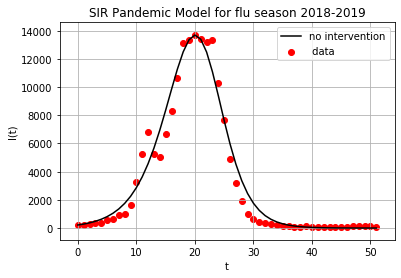

In [50]:
from scipy import optimize
import numpy as np
from pylab import *
%matplotlib inline

# data from https://www.cdc.gov/flu/weekly/weeklyarchives2018-2019/data/whoAllregt_phl39.html
# data is Type A (H1N1 & H3N2) flu, extracted by copying data from the table to a spread sheet then to a text editor
data = [218,223,311,340,390,546,668,897,1001,1660,3242,5288,6849,5238,5075,6663,8309,10659,13122,13313,13680,13416,13188,13364,10322,7664,4883,3201,1891,1028,634,404,333,276,212,144,129,109,93,128,102,105,104,104,79,78,94,140,133,150,153,110]
Ntot = 1352062

def func(x): # x[0] = beta, x[1] = gamma
    global In
    Sn = [Ntot - data[0]] # initial number susecptible are Ntot - the first number of infected people, data[0]
    In = [data[0]]        # initial number of infected are data[0]
    for i in range(1,len(data)):
        Sn.append(Sn[i-1] - x[0]*Sn[i-1]*In[i-1]/Ntot)
        In.append(In[i-1] + x[0]*Sn[i-1]*In[i-1]/Ntot - x[1]*In[i-1])  
    
    # compute the least-squares error
    error = 0
    for j in range(len(data)):
        error = error + (data[j] - In[j])**2
    return error

initial_guesses = [1,1] # [beta,gamma]
# the following routine calls the funtion func with initial guesses for unknowns and iterates until ???
minimum = optimize.fmin(func, initial_guesses) 
In_no_intervention = In
beta = minimum[0] # infection rate
gamma = minimum[1] # recovery rate

print("Fits to the 2004-2005 flu season data:")
print('beta =', beta)
print('gamma = ', gamma)
print("R0 = ", beta/gamma)
print("The average amount of time (days) a person is infectious = ", (1/gamma)*7)

# create the plot
tpoints = np.array(range(0,len(data)))
plot(tpoints,In_no_intervention, color='black', label='no intervention')
scatter(tpoints,data, color='red', label=' data')
legend(loc='upper right')
title("SIR Pandemic Model for flu season 2018-2019")
xlabel("t")
ylabel("I(t)")
grid()
show()

The 2018-2019 flu has a smaller $\beta$ at 2.3 vs 3.5 for the 2004-2005 data. This would imply that the 2018-2019 flu is less infectious than the 2004-2005 flu. However, $1/\gamma = 3.5$ days for the 2018-2019 flu while it was 2 days for the 2004-2005 flu season. This implies that the 2018-2019 flu has a longer contagious period than the 2004-2005 flu. The basic reproduction ratio is $R_0 = 1.15$ which is similar to the 2004-2005 flu season. *I have no idea how the 2018-2019 flu season compares to the 2004-2005 season from the perspective of an epidemilogist. Would be good to know.* 

#### Vaccination and Isolation/Quarantine Effects
The following code block simulates a 5% vaccination and a 5% change in $\beta$ for the 2018-2019 flu season.

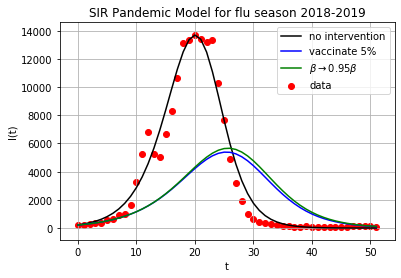

In [51]:
#############################################################
# Vaccinate (5% of suseptible population move to recovered)
#############################################################
def func_vac(x): # x[0] = beta, x[1] = gamma
    Sn = [0.95*Ntot - data[0]]
    In = [data[0]]
    for i in range(1,len(data)):
        Sn.append(Sn[i-1] - x[0]*Sn[i-1]*In[i-1]/Ntot)
        In.append(In[i-1] + x[0]*Sn[i-1]*In[i-1]/Ntot - x[1]*In[i-1])  
    return In

In_vaccinate = func_vac(minimum)

#############################################################
# Quarantine  (contact rate (beta) decreases by 5%)
#############################################################
def func_quarantine(x): # x[0] = beta, x[1] = gamma
    Sn = [Ntot - data[0]]
    In = [data[0]]
    for i in range(1,len(data)):
        Sn.append(Sn[i-1] - x[0]*Sn[i-1]*In[i-1]/Ntot)
        In.append(In[i-1] + x[0]*Sn[i-1]*In[i-1]/Ntot - x[1]*In[i-1])  
    return In

In_quarantine = func_quarantine([0.95*minimum[0],minimum[1]])

# create the plot
tpoints = np.array(range(0,len(data)))
plot(tpoints,In_no_intervention, color='black', label='no intervention')
plot(tpoints,In_vaccinate, color='blue', label='vaccinate 5%')
plot(tpoints,In_quarantine, color='green', label=r'$\beta \rightarrow 0.95 \beta$')
scatter(tpoints,data, color='red', label='data')
legend(loc='upper right')
title("SIR Pandemic Model for flu season 2018-2019")
xlabel("t")
ylabel("I(t)")
grid()
show()

Again, it is remarkable that a modest change in the initial number who are succeptible as well as quarantine / isolation can have on the total number of infected people. Get your flu shot people!

#### S(t), I(t), R(t)
Lastly, let's model $S(t)$, $I(t)$, and $R(t)$ for the 2018-2019 flu season. As before we'll plot both the original case and if an additional 5% had gotten their flu shot.

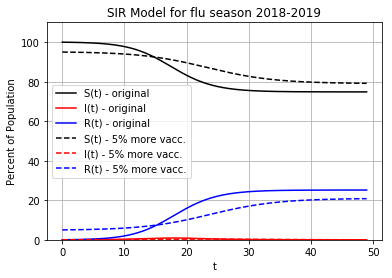

In [14]:
#####################################################
# Plot S(t), I(t), and R(t) for no intervention
#####################################################
def f(z,t):
    S=z[0]
    I=z[1]
    R=z[2]
    fx = - beta*S*I/Npop                    # fx = dS/dt
    fy = beta*S*I/Npop - gamma*I            # fy = dI/dt
    fz = gamma*I                            # fz = dR/dt
    return array([fx,fy,fz],float)

a = 0.0 # start of interval
b = 49.0 # end of interval (weeks)
N = 1000 # number of steps
h = (b-a)/N # size of a single step

tpoints = np.arange(a,b,h)
Spoints_no_intervention=[]
Ipoints_no_intervention=[]
Rpoints_no_intervention=[]

Spoints_intervention=[]
Ipoints_intervention=[]
Rpoints_intervention=[]

##############
# scale solution to get percentages of population
##############
Npop = 100
percent_infected = data[0]/Ntot

Si_no_intervention = Npop - percent_infected*Npop # initial number of suspectible
Ii_no_intervention = percent_infected*Npop # initial number of infected
Ri_no_intervention = 0 # initial number of recovered

Si_intervention = 0.95*Npop - percent_infected*Npop # initial number of suspectible
Ii_intervention = percent_infected*Npop # initial number of infected
Ri_intervention = 0.05*Npop # initial number of recovered

beta = minimum[0] # infection rate
gamma = minimum[1] # recovery rate

z_no_intervention = array([Si_no_intervention,Ii_no_intervention,Ri_no_intervention],float)
z_intervention = array([Si_intervention,Ii_intervention,Ri_intervention],float)

for t in tpoints:
    # no intervention
    Spoints_no_intervention.append(z_no_intervention[0])
    Ipoints_no_intervention.append(z_no_intervention[1])
    Rpoints_no_intervention.append(z_no_intervention[2])
    k1 = h*f(z_no_intervention,t)
    k2 = h*f(z_no_intervention+0.5*k1,t+0.5*h)
    k3 = h*f(z_no_intervention+0.5*k2,t+0.5*h)
    k4 = h*f(z_no_intervention+k3,t+h)
    z_no_intervention = z_no_intervention + (k1+2*k2+2*k3+k4)/6
    # intervention
    Spoints_intervention.append(z_intervention[0])
    Ipoints_intervention.append(z_intervention[1])
    Rpoints_intervention.append(z_intervention[2])
    k1 = h*f(z_intervention,t)
    k2 = h*f(z_intervention+0.5*k1,t+0.5*h)
    k3 = h*f(z_intervention+0.5*k2,t+0.5*h)
    k4 = h*f(z_intervention+k3,t+h)
    z_intervention = z_intervention + (k1+2*k2+2*k3+k4)/6

# create the plot
plot(tpoints,Spoints_no_intervention, linestyle='solid', color='black', label='S(t) - original')
plot(tpoints,Ipoints_no_intervention, linestyle='solid', color='red', label='I(t) - original')
plot(tpoints,Rpoints_no_intervention, linestyle='solid', color='blue', label='R(t) - original')
plot(tpoints,Spoints_intervention, linestyle='dashed', color='black', label='S(t) - 5% more vacc.')
plot(tpoints,Ipoints_intervention, linestyle='dashed', color='red', label='I(t) - 5% more vacc.')
plot(tpoints,Rpoints_intervention, linestyle='dashed', color='blue', label='R(t) - 5% more vacc.')
legend(loc='center left')
title("SIR Model for flu season 2018-2019")
xlabel("t")
ylabel("Percent of Population")
ylim(0, 110)
grid()
show()

The SIR model for the 2018-2019 flu season is similar to the earlier 2004-2005 flu season model: around 20-25% of the population will have recovered from the flu when it has run its course. Again, based on CDC data this percentage is high but our model is simple and being within a factor of 2 is good enough for me.

### COVID-19 Pandemic
Of course, the real reason to try to understand the SIR model is to apply it to the COVID-19 pandemic that is sweeping the planet. As of this date, March 26, 2020 the pandemic has not run its course. I'm tabulating data from the World Health Organization' [situation reports](https://www.who.int/emergencies/diseases/novel-coronavirus-2019/situation-reports) for the US. We'll also need the total number of tests given (ie $N_{tot}$) which seems to be tabulated [here.](https://ourworldindata.org/covid-testing) I'll update the notebook when I have data to run our model on. Stay safe. Wash your hands. Be responsible. Practice social distancing!